# Titanic Dataset Solution

There are two primary goals of this notebook.

* Do an exploratory data analysis(EDA) of titanic dataset with visualizations.
* Use machine learning classification models to predict the chances of a passengers' survival.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [167]:
train_data = pd.read_csv(r"C:\Users\aabha\Downloads\train.csv")

In [168]:
test_data = pd.read_csv(r"C:\Users\aabha\Downloads\test.csv")

In [169]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
train_data.shape

(891, 12)

In [171]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [174]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#  Dealing with missing value

In [176]:
def missing_values(df):

    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)

    return pd.concat([total, percent], axis = 1, keys = ('Total Missing Values', 'Percentage'))


In [177]:
missing_values(train_data)

,Total Missing Values,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [178]:
missing_values(test_data)

,Total Missing Values,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


# Embarked Feature

In [179]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [180]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We try to find the Embarked values of these rows by looking at other independent variables values.

<Figure size 1000x600 with 0 Axes>

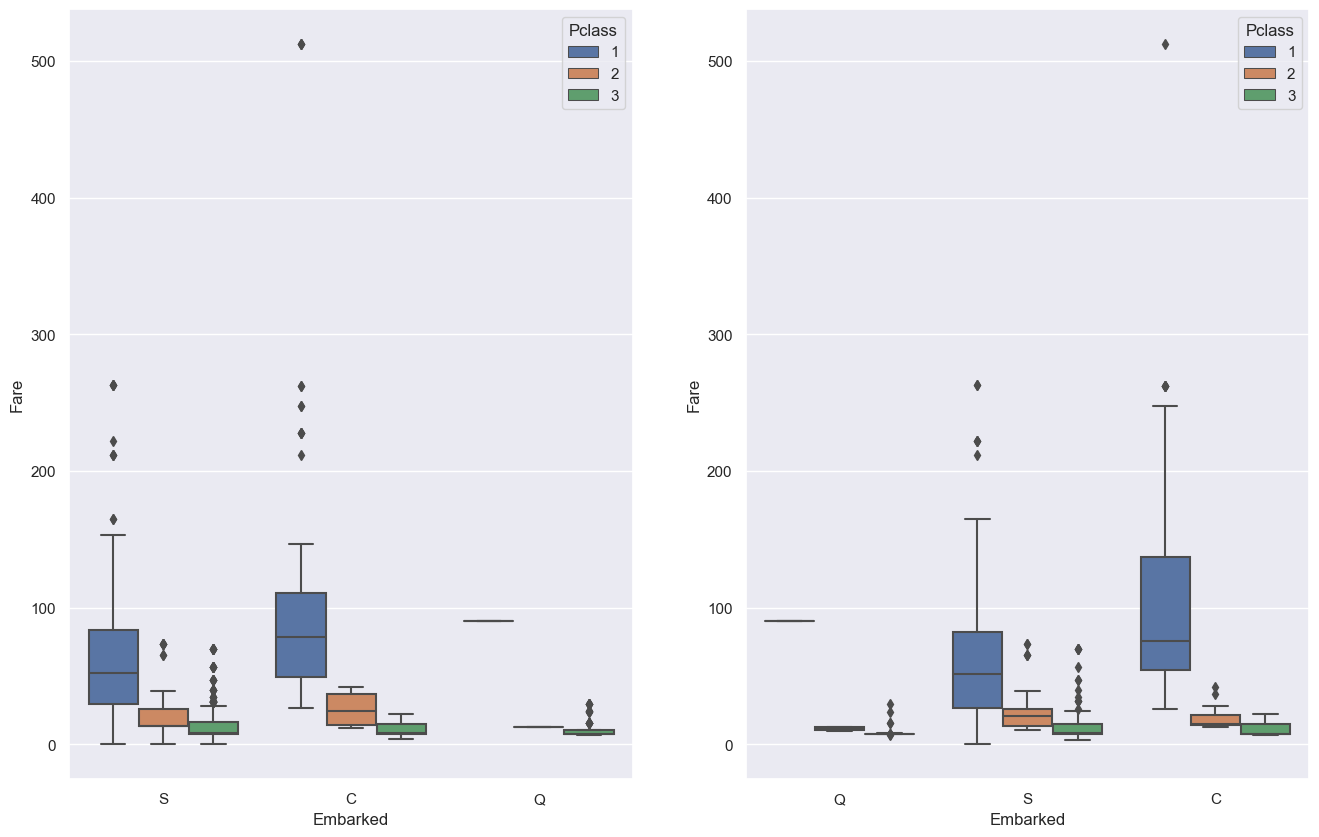

In [181]:
plt.figure(figsize = (10,6))

fig , ax = plt.subplots(figsize = (16,10) ,ncols = 2)
d1 = sns.boxplot(data = train_data, x = 'Embarked', y = 'Fare', hue = "Pclass", ax = ax[0]);

d2 = sns.boxplot(data = test_data, x = 'Embarked', y = 'Fare', hue = 'Pclass', ax = ax[1]);

In both the training set and the test set, the average fare closest to $80 is observed for passengers who embarked at "C" and have a Pclass of 1. Therefore, we should fill in the missing Embarked values with "C".

In [182]:
train_data['Embarked'].fillna('C', inplace = True)

In [183]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Cabin Feature

Approximately 77% of cabin data is missing from train data and 78% of cabin data is missing from test data.

In [184]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [185]:
survivers = train_data['Survived']

train_data.drop(['Survived'], axis = 1, inplace = True)

In [186]:
all_data = pd.concat([train_data, test_data], ignore_index = False)

all_data['Cabin'].fillna("N", inplace = True)

In [187]:
all_data.shape

(1309, 11)

In [188]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

per = round((all_data.Cabin.value_counts()/len(all_data)).to_frame() , 2)

In [189]:
per

,Cabin
N,0.77
C,0.07
B,0.05
D,0.04
E,0.03
A,0.02
F,0.02
G,0.00
T,0.00


We can use the average of the fare column and we can use python's groupby function to get the mean fare of each cabin letter.

In [190]:
all_data.groupby(['Cabin'])['Fare'].mean().reset_index()

,Cabin,Fare
0,A,41.244314
1,B,122.383078
2,C,107.926598
3,D,53.007339
4,E,54.564634
5,F,18.079367
6,G,14.205000
7,N,19.132707
8,T,35.500000


In [191]:
with_n = all_data[all_data['Cabin'] == 'N']
without_n = all_data[all_data['Cabin'] != 'N']

In [192]:
with_n[with_n['Cabin'] == 'G']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [193]:
def cabin_estimator(i):

    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [194]:
with_n['Cabin'] = with_n['Fare'].apply(lambda x : cabin_estimator(x))

In [195]:
all_data = pd.concat([with_n, without_n], axis=0)

In [196]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,F,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C,Q


In [197]:
all_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

In [198]:
all_data.shape

(1309, 11)

In [199]:
all_data.sort_values(by = 'PassengerId', inplace = True)

In [200]:
train_data = all_data[0:891]
train_data['Survived'] = survivers

test_data = all_data[891:]

In [201]:
train_data.shape

(891, 12)

In [202]:
test_data.shape

(418, 11)

# Fare

In [203]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [204]:
a = test_data[(test_data['Pclass'] == 3) & (test_data['Embarked'] == 'S') & (test_data['Sex'] == 'male')]
fare = a['Fare'].mean()

test_data['Fare'].fillna(fare, inplace = True)

In [205]:
test_data['Fare'].isnull().sum()

0

In [206]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

# Age

In [207]:
train_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

"Age" is the one with most missing values, let's see it in terms of percentage.

We will work on Age feature in feature engineering section.

# Visualization and Feature Relations

# Gender and Survived

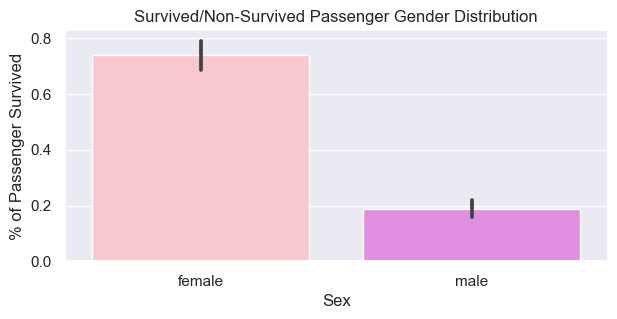

In [208]:
plt.figure(figsize = (7,3))

sns.set(style = "darkgrid")

gar1 = sns.barplot(data = train_data, x = 'Sex', y = 'Survived', order = ['female', 'male'],
            palette = ['Pink', 'Violet']).set(title = "Survived/Non-Survived Passenger Gender Distribution",
                                              ylabel = "% of Passenger Survived")

This bar graph shows that ~76% of females survived while only ~19% of male survived, that means females survived more as compared to male.

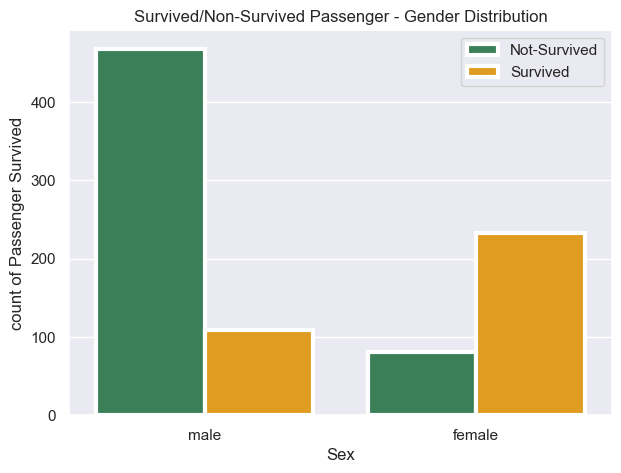

In [209]:
plt.figure(figsize = (7,5))

sns.set(style = "darkgrid")

gar1 = sns.countplot(data = train_data, x = 'Sex', hue = 'Survived',linewidth = 3,
            palette = ['seagreen', 'orange']).set(title = "Survived/Non-Survived Passenger - Gender Distribution",
                                              ylabel = "count of Passenger Survived")

plt.legend(['Not-Survived' , 'Survived'])

# Pclass and Survived

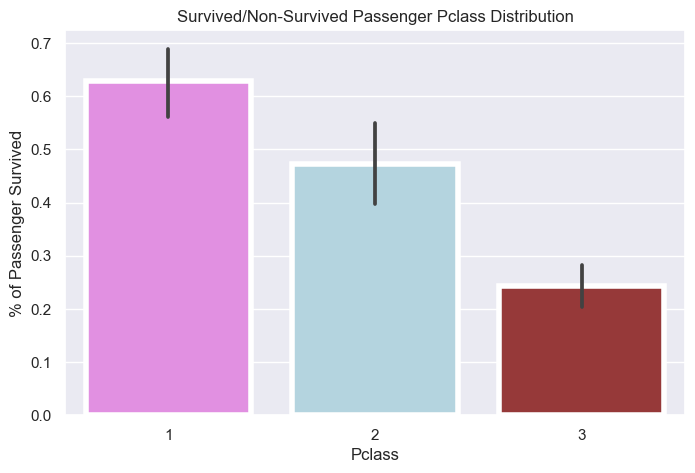

In [210]:
plt.figure(figsize = (8,5))

sns.set(style = "darkgrid")

gar1 = sns.barplot(data = train_data, x = 'Pclass', y = 'Survived', order = [1,2,3],linewidth = 4,
                  palette = ['Violet', 'lightblue', 'Brown']).set(title = "Survived/Non-Survived Passenger Pclass Distribution",
                                              ylabel = "% of Passenger Survived")

This bargraph shows that Pclass = 1 survived more as compared to pclass = 2 and pclass = 3.

# Fare and Survived

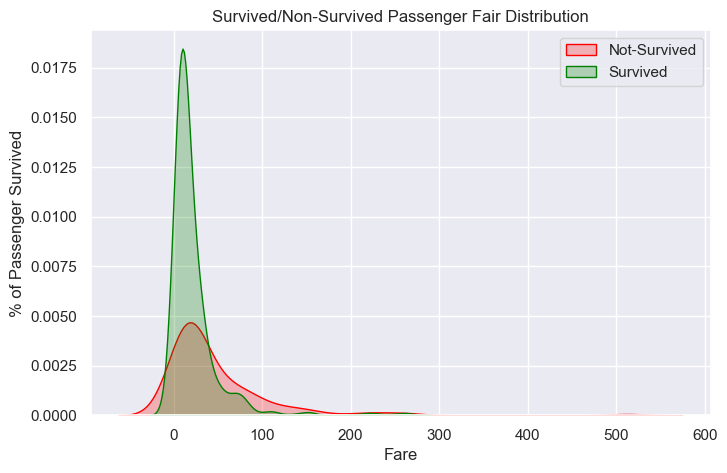

In [211]:
plt.figure(figsize = (8,5))

sns.set(style = "darkgrid")

gar1 = sns.kdeplot(data = train_data, x = 'Fare', hue = 'Survived', palette = ['Green', 'Red'],
                  fill = True).set(title = "Survived/Non-Survived Passenger Fair Distribution",
                                              ylabel = "% of Passenger Survived")

plt.legend(['Not-Survived','Survived'])

In [212]:
train_data[train_data['Fare'] > 300]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


These are the outliers in terms of Fare having the fare of ~ 512. We can drop these rows.

# Age and Survived

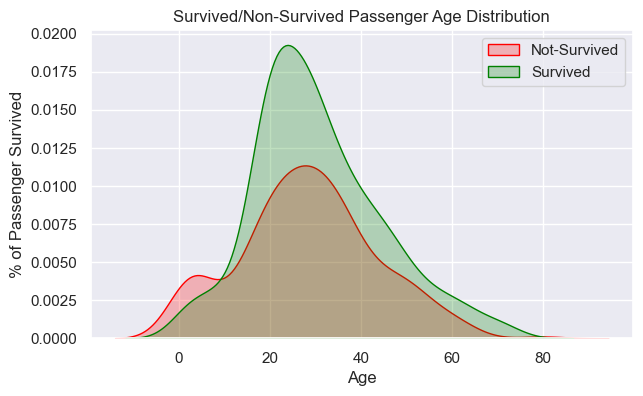

In [213]:
plt.figure(figsize = (7,4))

sns.set(style = "darkgrid")

gar1 = sns.kdeplot(data = train_data, x = 'Age', hue = 'Survived', palette = ['Green', 'Red'],
                  fill = True).set(title = "Survived/Non-Survived Passenger Age Distribution",
                                              ylabel = "% of Passenger Survived")

plt.legend(['Not-Survived','Survived'])

There is nothing extra ordinary in the graph, everything looks fine.

# Survived by Sex and Age

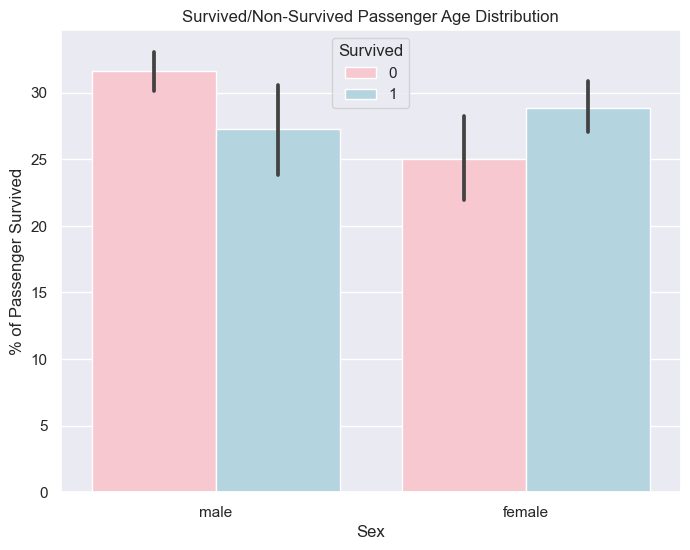

In [214]:
plt.figure(figsize = (8,6))

sns.set(style = "darkgrid")

gar1 = sns.barplot(data = train_data, x = 'Sex', y = 'Age', hue = 'Survived', palette = ['Pink', 'lightblue'],
                  fill = True).set(title = "Survived/Non-Survived Passenger Age Distribution",
                                              ylabel = "% of Passenger Survived")


# Statistical Analysis

In [215]:
train_data.shape

(891, 12)

In [216]:
train_data = train_data[train_data['Fare'] < 500]

In [217]:
train_data.shape

(888, 12)

In [218]:
train_data["Sex"].replace({"male" : 1, "female" : 0}, inplace = True)
test_data["Sex"].replace({"male" : 1, "female" : 0}, inplace = True)

In [219]:
train_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [220]:
train_data.groupby('Sex').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,,,,,,,
0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [221]:
train_data.groupby('Pclass').mean()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,,,
1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


In [222]:
train_data.groupby('Embarked').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Embarked,,,,,,,,
C,443.323353,1.892216,0.556886,31.007132,0.389222,0.359281,52.067716,0.550898
Q,417.896104,2.909091,0.532468,28.089286,0.428571,0.168831,13.276030,0.389610
S,449.527950,2.350932,0.684783,29.445397,0.571429,0.413043,27.079812,0.336957


In [223]:
train_data.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,,
0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


From this statistical analysis, we can conclude the following observations:

* Train data consist of 888 rows and 12 columns.
* ~74% of Female passenger survived while only ~18 % of male passenger survived.
* ~62% of Pclass 1 survived while only ~24% of Pclass 3 is survived.

In [224]:
train_data.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.033005,0.040265,0.036181,-0.056929,-0.002223,-0.002046,-0.006916
Pclass,-0.033005,1.000000,0.132881,-0.368625,0.080937,0.018212,-0.604960,-0.334068
Sex,0.040265,0.132881,1.000000,0.093296,-0.114799,-0.247003,-0.222361,-0.545899
Age,0.036181,-0.368625,0.093296,1.000000,-0.307639,-0.189194,0.100396,-0.079472
SibSp,-0.056929,0.080937,-0.114799,-0.307639,1.000000,0.415141,0.211816,-0.033395
Parch,-0.002223,0.018212,-0.247003,-0.189194,0.415141,1.000000,0.263910,0.082157
Fare,-0.002046,-0.604960,-0.222361,0.100396,0.211816,0.263910,1.000000,0.261742
Survived,-0.006916,-0.334068,-0.545899,-0.079472,-0.033395,0.082157,0.261742,1.000000


<Axes: >

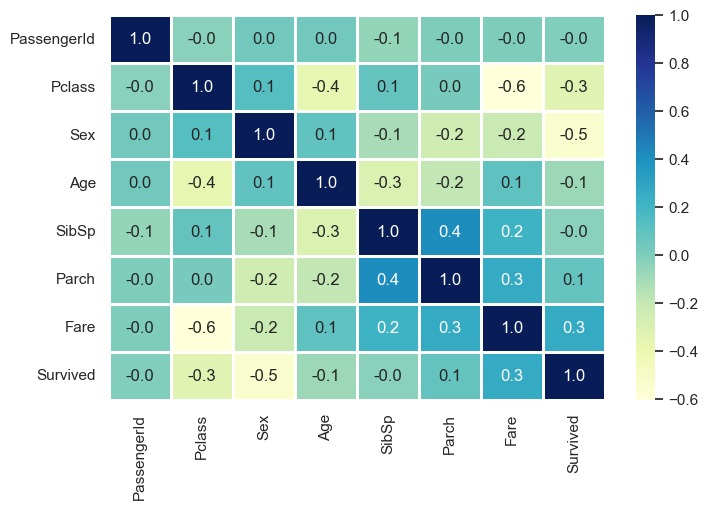

In [225]:
plt.figure(figsize = (8,5))

sns.heatmap(data = train_data.corr(), annot = True , fmt = ".1f", linewidth = 0.8, cmap = 'YlGnBu')

From this heat map, we can see Sex is the most correlated feature with Survived with correlation of around 0.5.

Survival rate of Men and Women

In [226]:
men = train_data[train_data['Sex'] == 1]['Survived'].mean()
women = train_data[train_data['Sex'] == 0]['Survived'].mean()

print("The Survival rate for men is", men)
print("The Survival rate for women is",women)

print("Mean Difference between the survival rate of both men and women is around", women - men, "and", round((women - men)*100,2) ,"%")

The Survival rate for men is 0.18608695652173912
The Survival rate for women is 0.7412140575079872
Mean Difference between the survival rate of both men and women is around 0.5551271009862481 and 55.51 %


# Feature Engineering

we will try to get the title name like miss, mr. etc for all datasets

In [227]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 888, dtype: object

In [228]:
a = ''
def name_define(i):
    if i < 20:
        a = 'Short'
    elif i >=20 & i <=35:
        a = 'middle'
    else:
        a = 'long'
        
    return a

train_data['name_length'] = [len(i) for i in train_data['Name']]

train_data['nlength'] = train_data['name_length'].apply(name_define)

In [229]:
train_data['nlength'].value_counts()

middle    685
Short     203
Name: nlength, dtype: int64

In [230]:
test_data['name_length'] = [len(i) for i in test_data['Name']]

test_data['nlength'] = test_data['name_length'].apply(name_define)

In [231]:
test_data['nlength'].value_counts()

middle    330
Short      88
Name: nlength, dtype: int64

Now, get the title of each name as a new feature

In [232]:
train_data['title'] = [i.split(".")[0] for i in train_data['Name']]

train_data['title'] = [i.split(",")[1] for i in train_data['title']]

In [233]:
train_data['title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [234]:
train_data['title'] = train_data['title'].apply(lambda x: x.strip())

In [235]:
train_data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [236]:
def tittle_change(i):
    
    a = ""
    if i in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        a = 'rare'
    elif i in ['Miss', 'Ms', 'Mlle', 'Lady']:
        a = 'Miss'
    elif i in ['Mme', 'Mrs']:
        a = 'Mrs'
    else:
        a = i
        
    return a
    

In [237]:
train_data['title'] = train_data['title'].map(tittle_change)

In [238]:
train_data['title'].value_counts()

Mr        515
Miss      184
Mrs       126
Master     40
rare       23
Name: title, dtype: int64

In [239]:
# now calculate same for test data

test_data['title'] = [i.split(".")[0] for i in test_data['Name']]
test_data['title'] = [i.split(",")[1] for i in test_data['title']]

test_data['title'] = [i.strip() for i in test_data['title']]

test_data['title'] = test_data['title'].apply(tittle_change)

In [240]:
test_data['title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
rare        6
Name: title, dtype: int64

Now, we will try to create new feature called family size

In [241]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Pclass       888 non-null    int64  
 2   Name         888 non-null    object 
 3   Sex          888 non-null    int64  
 4   Age          711 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Ticket       888 non-null    object 
 8   Fare         888 non-null    float64
 9   Cabin        888 non-null    object 
 10  Embarked     888 non-null    object 
 11  Survived     888 non-null    int64  
 12  name_length  888 non-null    int64  
 13  nlength      888 non-null    object 
 14  title        888 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 111.0+ KB


Here, Sibsp is denoting number of sibling/spouses and parch is denoting number of parents/childern, 
so for calculating family size, we will take into account these two features.

In [242]:
train_data['Parch'].value_counts()

0    676
1    117
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [243]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch']

In [244]:
train_data['Family_size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

As 0 does not mean anything here, we will add 1 to above.

In [245]:
train_data['Family_size'] = train_data['Family_size'] + 1

In [246]:
train_data['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [247]:
def family_define(i):
    
    a = ""
    if i <= 1:
        a = 'alone'
    elif i> 1 and i<=4:
        a = "short"
    else:
        a = "long"
        
    return a

In [248]:
train_data['Family_group'] = train_data['Family_size'].map(family_define)

In [249]:
train_data['is_alone'] = [1 if i < 2 else 0 for i in train_data['Family_size']]

In [250]:
# apply same on test data as well

test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Family_group'] = test_data['Family_size'].map(family_define)

test_data['is_alone'] = [1 if i < 2 else 0 for i in test_data['Family_size']]

Now look at the ticket feature

In [251]:
train_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [252]:
train_data['Ticket'].nunique()

680

There are 680 unique values here. So, nothing can be concluded from this feature. 

Hence, this feature is not usefull, we can drop this feature

In [253]:
train_data.drop(['Ticket'], axis = 1, inplace = True)

test_data.drop(['Ticket'], axis = 1, inplace = True)

Now we will look into Fare feature

Some people have travelled in groups like family or friends. It seems like Fare column kept a record of the total fare rather than the fare of individual passenger,therefore calculated fare will be much handy in this situation.

In [254]:
train_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
6.8583      1
12.6500     1
12.5250     1
12.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64

In [255]:
train_data['ind_fare'] = round(train_data['Fare']/train_data['Family_size'],2)

In [256]:
def fare_define(i):
    
    a = ""
    if i <= 4:
        a = "very_low"
    elif i> 4 and i<=10:
        a = "low"
    elif i> 10 and i<=20:
        a ="mid"
    elif i> 20 and i <= 45:
        a = "high"
    else:
        a = "very_high"
        
    return a

In [257]:
train_data['fare_group'] = train_data['ind_fare'].map(fare_define)

In [258]:
train_data['fare_group'].value_counts()

low          471
high         154
mid          153
very_high     69
very_low      41
Name: fare_group, dtype: int64

Do same for test data as well

In [259]:
test_data['ind_fare'] = round(test_data['Fare']/test_data['Family_size'],2)

test_data['fare_group'] = test_data['ind_fare'].map(fare_define)

In [260]:
test_data['fare_group'].value_counts()

low          216
mid           76
high          73
very_high     40
very_low      13
Name: fare_group, dtype: int64

In [261]:
passengerid = test_data['PassengerId']

Now we will look into the passenger_id feature

In [262]:
train_data.drop(['PassengerId'], axis = 1, inplace = True)

test_data.drop(['PassengerId'], axis = 1, inplace = True)

# Creating Dummy Variable

In [263]:
train_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Survived', 'name_length', 'nlength', 'title',
       'Family_size', 'Family_group', 'is_alone', 'ind_fare', 'fare_group'],
      dtype='object')

In [264]:
test_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'name_length', 'nlength', 'title', 'Family_size',
       'Family_group', 'is_alone', 'ind_fare', 'fare_group'],
      dtype='object')

In [265]:
train_data = pd.get_dummies(data= train_data, columns = ['Pclass','Embarked','Cabin','title','nlength', 'Family_group','fare_group'],drop_first = False)

In [266]:
test_data = pd.get_dummies(data = test_data, columns = ['Pclass','Embarked','Cabin','title','nlength', 'Family_group','fare_group'], drop_first = False)

In [267]:
train_data.drop(['Family_size','name_length', 'Fare', 'Name'], axis =1, inplace = True)

test_data.drop(['Family_size','name_length', 'Fare', 'Name'], axis =1, inplace = True)

In [268]:
train_data.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,...,nlength_Short,nlength_middle,Family_group_alone,Family_group_long,Family_group_short,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
0,1,22.0,1,0,0,0,3.62,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,0,38.0,1,0,1,0,35.64,1,0,0,...,0,1,0,0,1,1,0,0,0,0
2,0,26.0,0,0,1,1,7.92,0,0,1,...,0,1,1,0,0,0,1,0,0,0
3,0,35.0,1,0,1,0,26.55,1,0,0,...,0,1,0,0,1,1,0,0,0,0
4,1,35.0,0,0,0,1,8.05,0,0,1,...,0,1,1,0,0,0,1,0,0,0


In [269]:
test_data.head()

,Sex,Age,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,nlength_Short,nlength_middle,Family_group_alone,Family_group_long,Family_group_short,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
0,1,34.5,0,0,1,7.83,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
1,0,47.0,1,0,0,3.50,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,62.0,0,0,1,9.69,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,27.0,0,0,1,8.66,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,0,22.0,1,1,0,4.10,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0


Now, try to fill the missing value for age feature

In [270]:
train_data = pd.concat([train_data[['Survived','Age','Sex','SibSp','Parch']], train_data.loc[:,'is_alone':]], axis = 1)

In [271]:
test_data = pd.concat([test_data[['Age','Sex','SibSp','Parch']], test_data.loc[:,'is_alone':]], axis = 1)

In [272]:
train_data.shape

(888, 36)

In [273]:
test_data.shape

(418, 35)

In [274]:
from sklearn.ensemble import RandomForestRegressor

def guess_age(data):
    age_df = data.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()] 
    
    y = temp_train.Age.values 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators = 1500, n_jobs = -1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    data.loc[data.Age.isnull(), "Age"] = predicted_age
    
    return data
    
guess_age(train_data)
guess_age(test_data)

,Age,Sex,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,nlength_Short,nlength_middle,Family_group_alone,Family_group_long,Family_group_short,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
0,34.500000,1,0,0,1,7.83,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
1,47.000000,0,1,0,0,3.50,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,62.000000,1,0,0,1,9.69,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,27.000000,1,0,0,1,8.66,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,22.000000,0,1,1,0,4.10,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.351346,1,0,0,1,8.05,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0
414,39.000000,0,0,0,1,108.90,1,0,0,1,...,0,1,1,0,0,0,0,0,1,0
415,38.500000,1,0,0,1,7.25,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
416,23.351346,1,0,0,1,8.05,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


<Axes: xlabel='Age', ylabel='Density'>

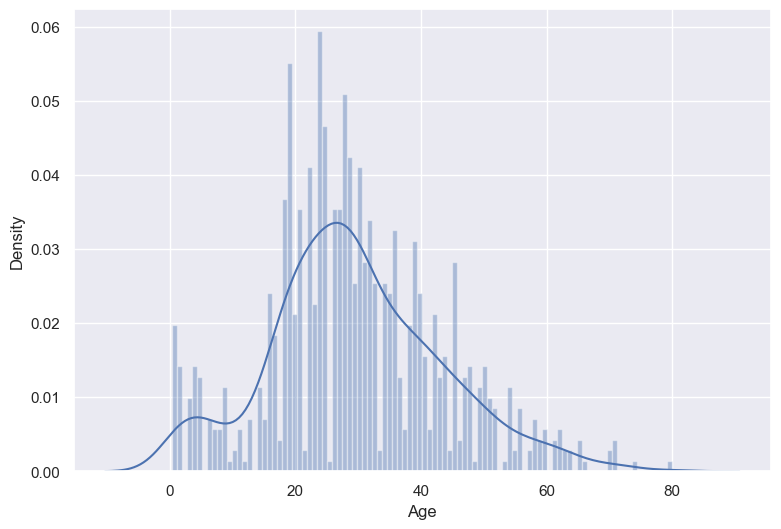

In [275]:
plt.subplots(figsize = (9,6),)

sns.distplot(train_data['Age'], bins = 100, kde = True)

In [284]:
def age_group(age):
    
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
    
train_data['age_group'] = train_data['Age'].map(age_group)
test_data['age_group'] = test_data['Age'].map(age_group)


## Creating dummies for "age_group" feature. 
train_data = pd.get_dummies(train_data, columns = ['age_group'])
test_data = pd.get_dummies(test_data, columns = ['age_group'])

# Pre-Modeling Tasks

Before we apply any machine learning models, It is important to separate dependent and independent variables. Our dependent variable or target variable is something that we are trying to find, and our independent variable is the features we use to find the dependent variable. The way we use machine learning algorithm in a dataset is that we train our machine learning model by specifying independent variables and dependent variable. To specify them, we need to separate them from each other, and the code below does just that.

In [285]:
X = train_data.drop(['Survived'], axis = 1)

In [286]:
Y = train_data['Survived']

# Splitting the training dataset

There are multiple ways to split the training dataset:


* Train - Test Split
* Cross Validation

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [288]:
X_train

,Age,Sex,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,age_group_toddler,age_group_Young_Adult,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
351,47.394267,1,0,0,1,35.00,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
124,54.000000,1,0,1,0,38.64,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
578,23.509159,0,1,0,0,7.23,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
423,28.000000,0,1,1,0,4.80,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
118,24.000000,1,0,1,0,123.76,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,32.000000,1,0,0,1,56.50,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
192,19.000000,0,1,0,0,3.93,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
630,80.000000,1,0,0,1,30.00,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
560,42.861426,1,0,0,1,7.75,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
X_test

,Age,Sex,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,age_group_toddler,age_group_Young_Adult,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
14,14.000000,0,0,0,1,7.85,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
158,24.852095,1,0,0,1,8.66,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
765,51.000000,0,1,0,0,38.98,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
743,24.000000,1,1,0,0,8.05,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
483,63.000000,0,0,0,1,9.59,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,27.000000,1,1,0,0,7.23,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
822,38.000000,1,0,0,1,0.00,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
64,35.990378,1,0,0,1,27.72,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
884,25.000000,1,0,0,1,7.05,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Feature Scaling

Here Age and Calculated_fare is much higher in magnitude compared to others machine learning features. This can create problems as many machine learning models will get confused thinking Age and Calculated_fare have higher weight than other features. Therefore, we need to do feature scaling to get a better result.

In [290]:
col_head = X_train.columns

In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
X_train

array([[ 1.28250816,  0.71995653, -0.4664246 , ..., -0.19164519,
        -0.2795085 , -0.19164519],
       [ 1.75513102,  0.71995653, -0.4664246 , ..., -0.19164519,
        -0.2795085 , -0.19164519],
       [-0.42640855, -1.38897274,  0.36114591, ..., -0.19164519,
        -0.2795085 , -0.19164519],
       ...,
       [ 3.6153627 ,  0.71995653, -0.4664246 , ..., -0.19164519,
        -0.2795085 , -0.19164519],
       [ 0.95819534,  0.71995653, -0.4664246 , ..., -0.19164519,
        -0.2795085 , -0.19164519],
       [-1.10676387,  0.71995653,  2.84385744, ..., -0.19164519,
         3.57770876, -0.19164519]])

In [293]:
pd.DataFrame(X_train, columns = col_head).head()

,Age,Sex,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,age_group_toddler,age_group_Young_Adult,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,1.282508,0.719957,-0.466425,-0.466105,0.799076,0.596631,1.779827,-0.514554,-1.107161,-0.471636,...,-0.191645,-1.041102,-0.451097,-0.248069,-0.114239,3.273680,-0.106774,-0.191645,-0.279508,-0.191645
1,1.755131,0.719957,-0.466425,0.710526,-1.251445,0.731892,1.779827,-0.514554,-1.107161,-0.471636,...,-0.191645,-1.041102,-0.451097,-0.248069,-0.114239,3.273680,-0.106774,-0.191645,-0.279508,-0.191645
2,-0.426409,-1.388973,0.361146,-0.466105,-1.251445,-0.435288,-0.561852,-0.514554,0.903211,2.120277,...,-0.191645,0.960521,-0.451097,-0.248069,-0.114239,-0.305467,-0.106774,-0.191645,-0.279508,-0.191645
3,-0.105101,-1.388973,0.361146,0.710526,-1.251445,-0.525585,-0.561852,-0.514554,0.903211,-0.471636,...,-0.191645,0.960521,-0.451097,-0.248069,-0.114239,-0.305467,-0.106774,-0.191645,-0.279508,-0.191645
4,-0.391290,0.719957,-0.466425,0.710526,-1.251445,3.894908,1.779827,-0.514554,-1.107161,2.120277,...,-0.191645,0.960521,-0.451097,-0.248069,-0.114239,-0.305467,-0.106774,-0.191645,-0.279508,-0.191645


# Modelling the Data

# Logistic Regression

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

y_pred = log_reg.predict(X_test)

# Evaluating a classification model

There are multiple ways to evaluate a classification model.

* Confusion Matrix.
* ROC Curve
* AUC Curve.

In [295]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[137,  23],
       [ 25,  82]], dtype=int64)

In [296]:
pd.DataFrame(cnf_matrix, columns = ('Predicted Not-Survived' , 'Predicted Survived'), index = ('Not-Survived', 'Survived'))

,Predicted Not-Survived,Predicted Survived
Not-Survived,137,23
Survived,25,82


In [297]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8202247191011236

In [298]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred)

0.7663551401869159

In [299]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_pred)

0.780952380952381

In [300]:
from sklearn.metrics import classification_report

target_names = ['Not Survived', 'Survived']
print(classification_report(Y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

Not Survived       0.85      0.86      0.85       160
    Survived       0.78      0.77      0.77       107

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



# AUC-ROC Curve

In [301]:
from sklearn.metrics import roc_curve, auc

y_score = log_reg.decision_function(X_test)

FPR, TPR, _ = roc_curve(Y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

0.8499999999999999


Text(0.5, 1.0, 'ROC for Titanic Survivers')

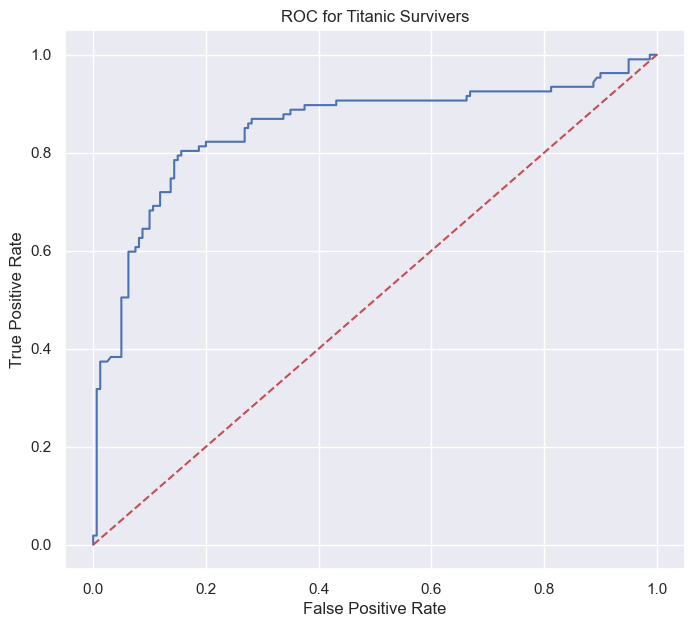

In [302]:
plt.figure(figsize = (8,7))
plt.plot(FPR, TPR)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Titanic Survivers")

0.8133436337434121


Text(0.5, 1.0, 'Precision Recall Curve for Titanic survivors')

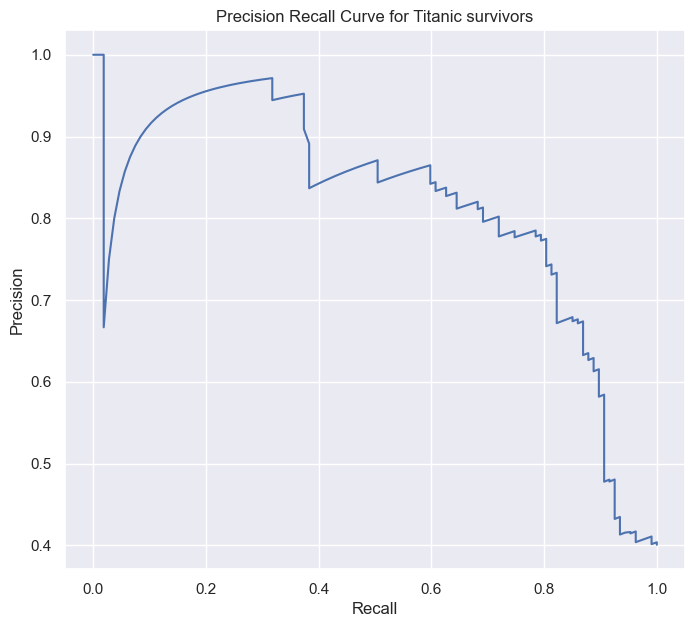

In [303]:
from sklearn.metrics import precision_recall_curve

y_score = log_reg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(Y_test, y_score)
pr_auc = auc(recall, precision)
print (pr_auc)


plt.figure(figsize = (8,7))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Titanic survivors')

# Cross Validation

In [304]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits = 8, test_size = 0.3, random_state = 0)
clf = LogisticRegression(solver = 'liblinear')
X = scaler.fit_transform(X)
accuracy = cross_val_score(clf, X, Y, cv=cv)

print("Cross Validation Accuracy = ", accuracy)

mean_accuracy = round(accuracy.mean(),5)
print("Mean Cross-Validation Accuracy = ", mean_accuracy)

Cross Validation Accuracy =  [0.83520599 0.80524345 0.82397004 0.80149813 0.80524345 0.83895131
 0.8164794  0.82397004]
Mean Cross-Validation Accuracy =  0.81882


In [305]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV

# as we are working with logistic regression, we are using lasso and ridge penality
# lasso, ridge has parameter alpha that inversely depends on model complexity (if value of alpha increases, model complexity decreases)

alpha = [1,10]
penality = ['l1' , 'l2']
parameters = {'C' : alpha , 'penalty' : penality}
cv = StratifiedShuffleSplit(n_splits = 8, test_size = 0.3, random_state = 0)

g_s_cv = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, n_jobs = -1, cv = cv, scoring = 'accuracy')

In [306]:
g_s_cv.fit(X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=0, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [307]:
# Choosing best results

print(g_s_cv.best_score_)
print(g_s_cv.best_params_)
print(g_s_cv.best_estimator_)

0.8206928838951311
{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10)


In [308]:
# using the best parameters from grid search and predicting score

log_reg_grid =g_s_cv.best_estimator_
log_reg_grid.score(X, Y)

0.8434684684684685

# K-Nearest Neighbours (KNN)

In [309]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)

accuracy = cross_val_score(neigh, X, Y, cv=cv, scoring = 'accuracy')

print("Cross Validation Accuracy = ", accuracy)

mean_accuracy = round(accuracy.mean(),2)
print("Mean Cross-Validation Accuracy = ", mean_accuracy)

Cross Validation Accuracy =  [0.79400749 0.76779026 0.79400749 0.7340824  0.75655431 0.83520599
 0.79400749 0.79400749 0.83520599 0.78651685]
Mean Cross-Validation Accuracy =  0.79


In [310]:
# Searching the optimal value of k

k_values = range(1,30)

k_scores = []

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors = k)
    cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
    accuracy = cross_val_score(neigh, X, Y, cv=cv, scoring = 'accuracy')
    k_scores.append(accuracy.mean())
    
print(k_scores)

print("Mean score = ", np.mean(k_scores))

[0.747565543071161, 0.7696629213483146, 0.7760299625468164, 0.7779026217228464, 0.7891385767790263, 0.7872659176029964, 0.7925093632958802, 0.7816479400749065, 0.7846441947565542, 0.7805243445692884, 0.7868913857677903, 0.7812734082397003, 0.7838951310861424, 0.7797752808988763, 0.7823970037453184, 0.7782771535580524, 0.7737827715355805, 0.7655430711610487, 0.7670411985018727, 0.7704119850187265, 0.7745318352059927, 0.7711610486891386, 0.7749063670411986, 0.7685393258426966, 0.7730337078651686, 0.7647940074906366, 0.7681647940074907, 0.7677902621722847, 0.7700374531835207]
Mean score =  0.775487537130311


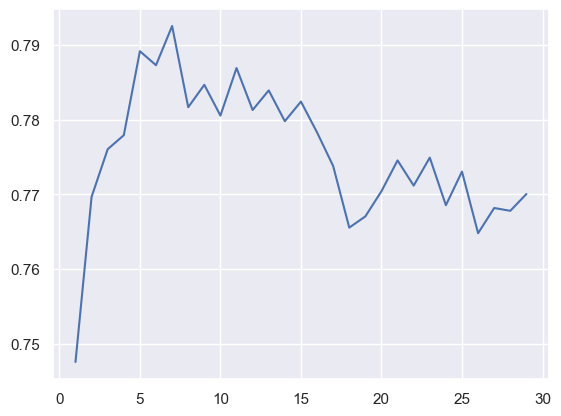

In [311]:
plt.plot(k_values, k_scores)

In [312]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV

# as we are working with logistic regression, we are using lasso and ridge penality
# lasso, ridge has parameter alpha that inversely depends on model complexity (if value of alpha increases, model complexity decreases)

alpha = range(1,31)
penality = ['uniform' , 'distance']
parameters = {'n_neighbors' : alpha , 'weights' : penality}
cv = StratifiedShuffleSplit(n_splits = 8, test_size = 0.3, random_state = 0)

g_s_cv = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = parameters, n_jobs = -1, cv = cv, scoring = 'accuracy')

In [313]:
g_s_cv.fit(X,Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=0, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [314]:
print(g_s_cv.best_estimator_)
print(g_s_cv.best_score_)
print(g_s_cv.best_params_)

KNeighborsClassifier(n_neighbors=7)
0.7888576779026217
{'n_neighbors': 7, 'weights': 'uniform'}


In [315]:
neigh_grid =g_s_cv.best_estimator_
neigh_grid.score(X, Y)

0.8355855855855856

# Gausian Naive Bayes

In [316]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaus = GaussianNB()
gaus.fit(X, Y)
y_pred = gaus.predict(X_test)
accuracy = accuracy_score(y_pred, Y_test)
print(accuracy)

0.797752808988764


In [317]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb = {'var_smoothing': np.logspace(0,-9, num = 50)}
cv = StratifiedShuffleSplit(n_splits = 8, test_size = 0.3, random_state = 0)

grid = GridSearchCV(estimator = GaussianNB(), param_grid = nb, cv = cv, n_jobs = -1)

In [318]:
grid.fit(X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=0, test_size=0.3,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.2505...
       3.90693994e-05, 2.55954792e-05, 1.67683294e-05, 1.09854114e-05,
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])})

In [319]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

GaussianNB(var_smoothing=0.1842069969326716)
0.7851123595505618
{'var_smoothing': 0.1842069969326716}


In [320]:
g_nb = grid.best_estimator_
g_nb.score(X, Y)

0.7804054054054054

# Support Vector Machine

In [321]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10,5,2,3,4,0,0.01],
    'kernel': ['rbf'],
    'gamma': [0.1, 1, 0.001, 0.0001, 0.01]
}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=cv)
grid_search.fit(X,Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 5, 2, 3, 4, 0, 0.01],
                         'gamma': [0.1, 1, 0.001, 0.0001, 0.01],
                         'kernel': ['rbf']})

In [322]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_params_)

SVC(C=3, gamma=0.001, probability=True)
0.8441947565543071
{'C': 3, 'gamma': 0.001, 'kernel': 'rbf'}


In [323]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X, Y)

0.8265765765765766

# Descision Tree Classifier

In [324]:
from sklearn.tree import DecisionTreeClassifier

depth = range(1,31)
crit = ['gini', 'entropy']
param = {'max_features' : [20,22,24,23,25,26,'auto'], 'max_depth' : depth, 'criterion' : crit}

cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.30, random_state = 15)
grid_search = GridSearchCV(DecisionTreeClassifier() , param_grid = param, cv = cv, verbose = False)

grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'max_features': [20, 22, 24, 23, 25, 26, 'auto']},
             verbose=False)

In [325]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.8314606741573034
DecisionTreeClassifier(max_depth=4, max_features=25)
{'criterion': 'gini', 'max_depth': 4, 'max_features': 25}


In [326]:
dtc = grid_search.best_estimator_
dtc.score(X,Y)

0.8423423423423423

# Random Forest Classifier

In [327]:
from sklearn.ensemble import RandomForestClassifier


depth = range(1,10)
crit = ['gini', 'entropy']
param = {'max_features' : ['auto'], 'max_depth' : depth, 'criterion' : crit, 'n_estimators' : [110,120,130,140,150]}

cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.30, random_state = 10)
grid_search = GridSearchCV(RandomForestClassifier() , param_grid = param, cv = cv, verbose = False)

grid_search.fit(X, Y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10), 'max_features': ['auto'],
                         'n_estimators': [110, 120, 130, 140, 150]},
             verbose=False)

In [328]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.8329588014981274
RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=150)
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 150}


In [329]:
rfc = grid_search.best_estimator_
rfc.score(X,Y)

0.8547297297297297

# Predicting Test Cases

In [330]:
models = [neigh_grid, log_reg_grid, svm_grid, g_nb, dtc, rfc]

c = {}

for i in models:
    y_pred = i.predict(X_test)
    acc = accuracy_score(y_pred, Y_test)
    c[i] = acc

In [331]:
print(c)

{KNeighborsClassifier(n_neighbors=7): 0.8426966292134831, LogisticRegression(C=10): 0.8314606741573034, SVC(C=3, gamma=0.001, probability=True): 0.8164794007490637, GaussianNB(var_smoothing=0.1842069969326716): 0.7940074906367042, DecisionTreeClassifier(max_depth=4, max_features=25): 0.8052434456928839, RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=150): 0.8389513108614233}


In [332]:
test_data.head()

,Age,Sex,SibSp,Parch,is_alone,ind_fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,age_group_toddler,age_group_Young_Adult,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,34.5,1,0,0,1,7.83,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,47.0,0,1,0,0,3.50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,62.0,1,0,0,1,9.69,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27.0,1,0,0,1,8.66,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,22.0,0,1,1,0,4.10,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [333]:
test_data.to_numpy()

array([[34.5       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [47.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [62.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [38.5       ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [23.35134627,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 7.16415704,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [334]:
test_pred = (max(c, key = c.get)).predict(test_data.to_numpy())

In [335]:
final = pd.DataFrame({'Passenger ID' : passengerid, 'Survived' : test_pred})

In [336]:
final['Survived'].value_counts()

1    211
0    207
Name: Survived, dtype: int64

In [337]:
final

,Passenger ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
